In [102]:
import tensorflow as tf
import keras
from keras import models
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

dataset_path = "../input/vada_pav_dataset"

# Any results you write to the current directory are saved as output.

['not_vada_pav', 'vada_pav']


# Image Data Generator

In [81]:

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range = 30,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,                                   
                                   validation_split=0.2
                                  )

In [103]:
train_gen = train_datagen.flow_from_directory(directory = dataset_path,
                                            target_size = (150,150),
                                            batch_size = 16,
                                            color_mode = "rgb",
                                            class_mode = 'binary',
                                            shuffle = True,
                                            subset = 'training',
                                             )
            
test_gen = train_datagen.flow_from_directory(directory = dataset_path,
                                             target_size = (150,150),
                                            batch_size = 16,
                                            color_mode = "rgb",
                                            class_mode = 'binary',
                                            shuffle = True,
                                            subset = 'validation'
                                            )

Found 876 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


# Download VGG19 Model

In [91]:
base_model = VGG19(weights='imagenet', include_top=False,input_shape = (150,150,3))

# VGG19 model architecture

In [92]:
print(base_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

# Sequential model construction

In [93]:
model = models.Sequential()
model.add(base_model)
model.add(Flatten())

model.add(Dense(516, use_bias= False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation = 'sigmoid'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_12 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 516)               4227072   
_________________________________________________________________
batch_normalization_823 (Bat (None, 516)               2064      
_________________________________________________________________
activation_819 (Activation)  (None, 516)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 516)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 517       
Total para

In [104]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', patience=6) #stop training if val_loss does not imporve in 6 epochs

## compile and fit model

In [94]:
#compile
model.compile(optimizer=keras.optimizers.SGD(lr=2e-5, decay=0.0, momentum=0.9, nesterov=True),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# fit the model
history = model.fit_generator(
    train_gen,
    epochs=30,
    steps_per_epoch = len(train_gen),
    callbacks = [callback],
    validation_data= test_gen,
    validation_steps = len(test_gen)
    )

Epoch 1/30


/opt/conda/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


55/55 [==============================] - 201s 4s/step - loss: 0.6462 - acc: 0.6530 - val_loss: 0.5348 - val_acc: 0.7110
Epoch 2/30
55/55 [==============================] - 30s 544ms/step - loss: 0.4625 - acc: 0.8118 - val_loss: 0.3991 - val_acc: 0.8716
Epoch 3/30
55/55 [==============================] - 33s 595ms/step - loss: 0.3456 - acc: 0.8686 - val_loss: 0.3525 - val_acc: 0.8761
Epoch 4/30
55/55 [==============================] - 34s 611ms/step - loss: 0.2973 - acc: 0.8860 - val_loss: 0.3102 - val_acc: 0.9220
Epoch 5/30
55/55 [==============================] - 34s 609ms/step - loss: 0.2797 - acc: 0.8939 - val_loss: 0.2675 - val_acc: 0.9128
Epoch 6/30
55/55 [==============================] - 33s 609ms/step - loss: 0.2498 - acc: 0.9053 - val_loss: 0.2623 - val_acc: 0.9037
Epoch 7/30
55/55 [==============================] - 33s 602ms/step - loss: 0.2483 - acc: 0.9144 - val_loss: 0.2207 - val_acc: 0.9220
Epoch 8/30
55/55 [==============================] - 33s 603ms/step - loss: 0.2144 

In [ ]:
## Training and validation accuracy and loss plot

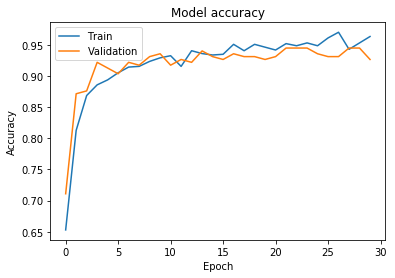

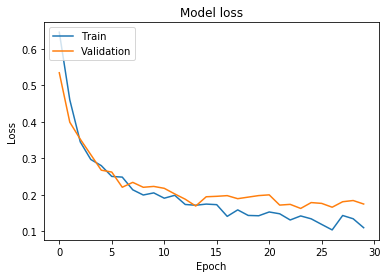

In [111]:
#training and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()